In [7]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats

In [8]:
def test(f_loss_file):    
    train_losses = []
    val_losses = []
    val_aurocs = []

    bag_test_aurocs = []

    f_loss = open(f_loss_file)
    count = -1
    params = ''
    for line_loss in f_loss:
        # print(line_loss)
        if count == -1:
            params = line_loss
        count += 1
        if count > 0:
            train_losses.append(float(line_loss.split(', ')[1]))
            val_losses.append(float(line_loss.split(', ')[2]))
            val_aurocs.append(float(line_loss.split(', ')[3]))
            bag_test_aurocs.append(float(line_loss.split(',')[4]))
    # print(len(val_aurocs) - np.argmax(val_aurocs))
    return bag_test_aurocs[np.argmax(val_aurocs)]

1 100.0 sglmodel
0.833 (0.820, 0.846)
0.934 (0.913, 0.956)
[0.8286921452, 0.8513189448, 0.8077645991, 0.8324043821, 0.852978942, 0.8583638584, 0.8211985165, 0.8394230769, 0.8338461538, 0.7389326671]
[0.8916202548, 0.9346794872, 0.8900198451, 0.9256527038, 0.9379610116, 0.9444123128, 0.9637388686, 0.9540362333, 0.887102133, 0.9340581575]


2 88.8888888888889 sglmodel
0.826 (0.795, 0.856)
0.910 (0.896, 0.924)
[0.8074828625, 0.8434799309, 0.7040220668, 0.7714523566, 0.8594470046, 0.8624767046, 0.8366797101, 0.8174130309, 0.8338461538, 0.7656680993]
[0.8974950349, 0.8976453937, 0.8328197227, 0.9283974359, 0.9033333333, 0.9161757172, 0.8619386252, 0.9541290281, 0.9291593752, 0.916288]


3 77.77777777777779 sglmodel
0.820 (0.811, 0.830)
0.915 (0.899, 0.932)
[0.8161317189, 0.8564076171, 0.8111879078, 0.7711213518, 0.8325325133, 0.863742236, 0.8211985165, 0.8196794872, 0.8308294813, 0.7346205658]
[0.8433487417, 0.94176, 0.8915384615, 0.9164959016, 0.8136553945, 0.9495754748, 0.9142307692, 0.89

Text(0.5, 0, '% Absolute Position Information')

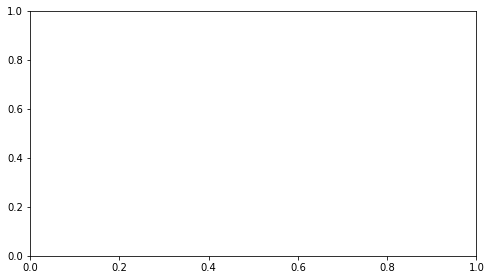

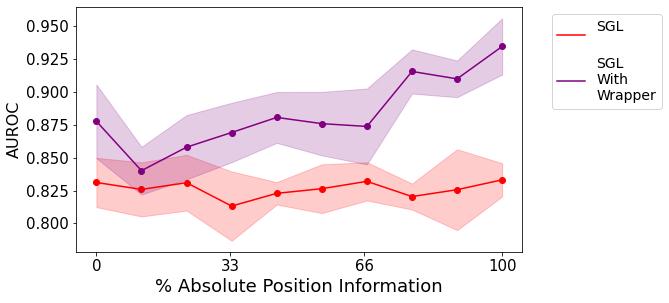

In [12]:
bagrocs = {}
bagrocs_pe = {}
bagrocs_linearpe = {}

bagrocs_iqr = {}
bagrocs_pe_iqr = {}
bagrocs_linearpe_iqr = {}

bagrocs_diff = {}
bagrocs_diff_iqr = {}

bagrocs_diff_pecomp = {}
bagrocs_diff_pecomp_iqr = {}

bagrocs_diff_lintoreg = {}
bagrocs_diff_lintoreg_iqr = {}


gpi = [100.0, 88.8888888888889, 77.77777777777779, 66.66666666666666, 55.55555555555556, 44.44444444444445, 33.333333333333336, 22.222222222222225, 11.111111111111112, 0.0]
all_models = ['sglmodel']

proper_labels1 = ['SGL\n']
proper_labels2 = ['SGL\nWith\nWrapper']
plotted_models = ['sglmodel']
colors = ['red', 'green']

fig, ax = plt.subplots()
fig.set_figheight(4.5)
fig.set_figwidth(8)

fig2, ax2 = plt.subplots()
fig2.set_figheight(4.5)
fig2.set_figwidth(8)

COUNT = -1
labs = ['a', 'b', 'c']
for num_bags in [100]:
    COUNT += 1
    for model in all_models:
        bagrocs[model] = []
        bagrocs_pe[model] = []
        bagrocs_linearpe[model] = []

        bagrocs_iqr[model] = []
        bagrocs_pe_iqr[model] = []
        bagrocs_linearpe_iqr[model] = []

        bagrocs_diff[model] = []
        bagrocs_diff_iqr[model] = []

        bagrocs_diff_pecomp[model] = []
        bagrocs_diff_pecomp_iqr[model] = []

        bagrocs_diff_lintoreg[model] = []
        bagrocs_diff_lintoreg_iqr[model] = []


    for perm_dist in range(1, 11):
        for model in all_models:
            currbr = []
            currbrpe = []
            currbrlinearpe = []
            for seed in range(10):
                nope = model
                pe = model + '_pe'

                try:
                    f_loss_file = '/data2/user/txtfiles/seed%d_numbags%d_MNIST_permdist%d_%s_loss.txt'%(seed, num_bags, perm_dist, nope)
                    currbr.append(test(f_loss_file))
                except:
                    error = 1
                    currbr.append(0)
                try:
                    f_loss_file = '/data2/user/txtfiles/seed%d_numbags%d_MNIST_permdist%d_%s_loss.txt'%(seed, num_bags, perm_dist, pe)
                    currbrpe.append(test(f_loss_file))
                except:
                    error = 1
                    currbrpe.append(0)

                try:
                    f_loss_file = '/data2/user/txtfiles/seed%d_numbags%d_MNIST_permdist%d_%s_loss.txt'%(seed, num_bags, perm_dist, linearpe)
                    currbrlinearpe.append(test(f_loss_file))
                except:
                    error = 1
                    currbrlinearpe.append(0)

            print(perm_dist, gpi[perm_dist - 1], model)
            print('%0.3f (%0.3f, %0.3f)'%(np.median(currbr), np.median(currbr) - stats.iqr(currbr)/2, np.median(currbr) + stats.iqr(currbr)/2))
            print('%0.3f (%0.3f, %0.3f)'%(np.median(currbrpe), np.median(currbrpe) - stats.iqr(currbrpe)/2, np.median(currbrpe) + stats.iqr(currbrpe)/2))
            print(currbr)
            print(currbrpe)
            bagrocs[model].append(np.median(currbr))
            bagrocs_pe[model].append(np.median(currbrpe))
            bagrocs_linearpe[model].append(np.median(currbrlinearpe))

            bagrocs_iqr[model].append(stats.iqr(currbr)/2)
            bagrocs_pe_iqr[model].append(stats.iqr(currbrpe)/2)
            bagrocs_linearpe_iqr[model].append(stats.iqr(currbrlinearpe)/2)

            bagrocs_diff[model].append(np.median(np.array(currbrpe) - np.array(currbr)))
            bagrocs_diff_iqr[model].append(stats.iqr(np.array(currbrpe) - np.array(currbr))/2)

            bagrocs_diff_pecomp[model].append(np.median(np.array(currbrpe) - np.array(currbrlinearpe)))
            bagrocs_diff_pecomp_iqr[model].append(stats.iqr(np.array(currbrpe) - np.array(currbrlinearpe))/2)

            bagrocs_diff_lintoreg[model].append(np.median(np.array(currbrlinearpe) - np.array(currbr)))
            bagrocs_diff_lintoreg_iqr[model].append(stats.iqr(np.array(currbrlinearpe) - np.array(currbr))/2)


            print()
        print()

#     x = np.array(list(range(1, 4)))
#     curryerr = [[bagrocs_pe_iqr['transmil'][9], bagrocs_pe_iqr['transmil'][9]]]
#     curryerr.append([bagrocs_iqr['abdmil'][9], bagrocs_iqr['abdmil'][9]])
#     curryerr.append([bagrocs_pe_iqr['abdmil'][9], bagrocs_pe_iqr['abdmil'][9]])
#     curryerr = np.array(curryerr)
#     curryerr = curryerr.T
#     ax.bar(x - 0.2, [bagrocs_pe['transmil'][9], bagrocs['abdmil'][9], bagrocs_pe['abdmil'][9]], yerr = curryerr, width=0.4, align='center', color='blue', alpha=0.4, capsize=3, label = 'Task With\nWeak\nAbsolute\nPosition\nInformation')
    
#     curryerr = [[bagrocs_pe_iqr['transmil'][0], 1 - bagrocs_pe['transmil'][0]]]
#     curryerr.append([bagrocs_iqr['abdmil'][0], bagrocs_iqr['abdmil'][0]])
#     curryerr.append([bagrocs_pe_iqr['abdmil'][0], bagrocs_pe_iqr['abdmil'][0]])
#     curryerr = np.array(curryerr)
#     curryerr = curryerr.T
#     ax.bar(x + 0.2, [bagrocs_pe['transmil'][0], bagrocs['abdmil'][0], bagrocs_pe['abdmil'][0]], yerr = curryerr, width=0.4, align='center', color='green',  alpha=0.4, capsize=3, label = 'Task With\nStrong\nAbsolute\nPosition\nInformation')
   
#     ax.set_xticks(range(1, 4))
#     ax.set_xticklabels(['TransMIL', 'ABDMIL', 'ABDMIL\nWith\nWrapper'])
#     for tick in ax.xaxis.get_major_ticks():
#         tick.label.set_fontsize(13)
#     for tick in ax.yaxis.get_major_ticks():
#         tick.label.set_fontsize(13)

#     if COUNT == 0:
for i, model in enumerate(['sglmodel']):
    ax2.scatter(gpi, np.array(bagrocs[model]), color = 'red')
    ax2.plot(gpi, np.array(bagrocs[model]), label = proper_labels1[i], color = 'red')
    ax2.fill_between(gpi, np.array(bagrocs[model]) - np.array(bagrocs_iqr[model]), np.array(bagrocs[model]) + np.array(bagrocs_iqr[model]), alpha=0.2, color = 'red')

    ax2.scatter(gpi, np.array(bagrocs_pe[model]), color = 'purple')
    ax2.plot(gpi, np.array(bagrocs_pe[model]), label = proper_labels2[i], color = 'purple')
    ax2.fill_between(gpi, np.array(bagrocs_pe[model]) - np.array(bagrocs_pe_iqr[model]), np.array(bagrocs_pe[model]) + np.array(bagrocs_pe_iqr[model]), alpha=0.2, color = 'purple')

for tick in ax2.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
ymin, ymax = ax2.get_ylim()
xmin, xmax = ax2.get_xlim()
ax2.set_xticks([0, 33, 66, 100], labels = [0, 33, 66, 100])

# ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=14)
# ax.yaxis.grid(True)
# ax.set_ylabel('AUROC', fontsize=16)
# ax.set_ylim(0.4, 1.02)

ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=14)
ax2.set_ylabel('AUROC', fontsize=16)
ax2.set_xlabel('% Absolute Position Information', fontsize=18)



# fig.tight_layout()
# fig.savefig('synth_plot_0vs100.png')


# fig2.tight_layout()
# fig2.savefig('synth_plot_sgl.png')